In [23]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from smart_simulation.cfg_templates.config import package_dir
from smart_simulation.outputs import output_utils as ou
from smart_simulation.ds_tools import data_eng as de
from smart_simulation.ds_tools import eda
from sklearn.model_selection import TimeSeriesSplit
# from smart_simulation.ds_tools import sma_forecast as sma
# from smart_simulation.ds_tools import analyze_forecast as af

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
weights_file_list = ou.weight_files()
servings_file_list = ou.servings_files()

# EDA
## Quick Visualization and data clean up
### Raw Weight Visualization

In [4]:
sample = de.load_sim_data(weights_file_list[-1], ['weight'])

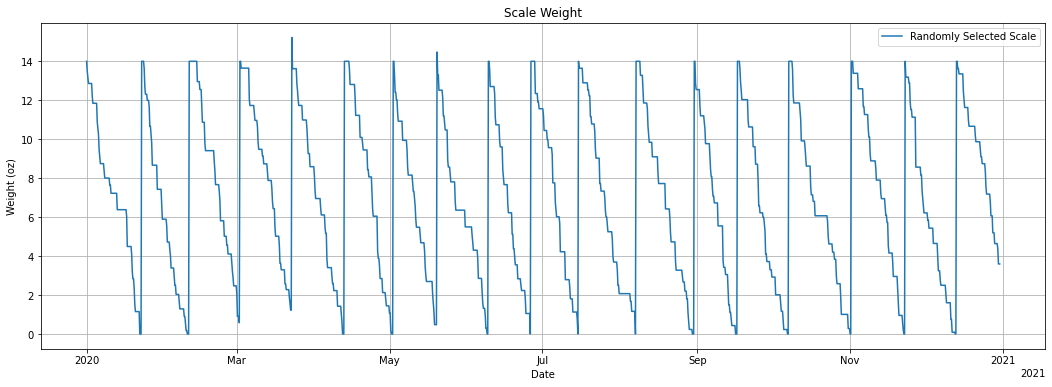

In [5]:
eda.plot_weights(sample.weight, 'Scale Weight', 'Randomly Selected Scale', bar = False)

### Consumption Visualization
#### Raw Consumption Calculation

In [6]:
raw_consumption = de.calculate_consumption(weight_series = sample.weight, adjustments = None)

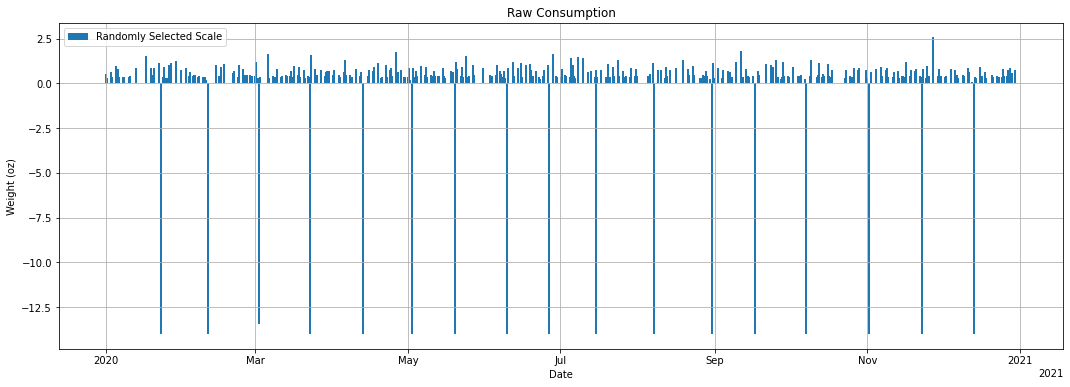

In [7]:
eda.plot_weights(raw_consumption, 'Raw Consumption', 'Randomly Selected Scale', bar = True)

#### Find Product Arrival Dates to Fix Consumption Outliers

In [8]:
estimated_peaks = eda.find_weight_peaks(weight_series = sample.weight)
segments = eda.create_consumption_segments(weight_series = sample.weight, peaks = estimated_peaks)
segments_data = eda.create_segments_data(consumption_segments = segments, weight_series = sample.weight)
segments_misaligned = eda.segments_misaligned(segments_data = segments_data)

print(f"\nBreak Point Segments Misaligned: {segments_misaligned}\n")
segments_data


Break Point Segments Misaligned: False



,time_delta,start_time,max_weight_time,end_time,min_weight_time,start_weight,max_weight,end_weight,min_weight
0,21 days 18:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-22 18:00:00,2020-01-22 18:00:00,14.000000,14.000000,0.000000,0.000000
1,18 days 18:00:00,2020-01-23 00:00:00,2020-01-23 00:00:00,2020-02-10 18:00:00,2020-02-10 18:00:00,14.000000,14.000000,0.000000,0.000000
2,20 days 00:00:00,2020-02-11 00:00:00,2020-02-11 00:00:00,2020-03-02 00:00:00,2020-03-02 00:00:00,14.000000,14.000000,0.575235,0.575235
3,20 days 12:00:00,2020-03-02 06:00:00,2020-03-02 06:00:00,2020-03-22 18:00:00,2020-03-22 18:00:00,14.000000,14.000000,1.223625,1.223625
4,20 days 18:00:00,2020-03-23 00:00:00,2020-03-23 00:00:00,2020-04-12 18:00:00,2020-04-12 18:00:00,15.223625,15.223625,0.000000,0.000000
5,19 days 06:00:00,2020-04-13 00:00:00,2020-04-13 00:00:00,2020-05-02 06:00:00,2020-05-02 06:00:00,14.000000,14.000000,0.000000,0.000000
6,17 days 06:00:00,2020-05-02 12:00:00,2020-05-02 12:00:00,2020-05-19 18:00:00,2020-05-19 18:00:00,14.000000,14.000000,0.478759,0.478759
7,20 days 06:00:00,2020-05-20 00:00:00,2020-05-20 00:00:00,2020-06-09 06:00:00,2020-06-09 06:00:00,14.478759,14.478759,0.000000,0.000000
8,16 days 18:00:00,2020-06-09 12:00:00,2020-06-09 12:00:00,2020-06-26 06:00:00,2020-06-26 06:00:00,14.000000,14.000000,0.000000,0.000000
9,18 days 18:00:00,2020-06-26 12:00:00,2020-06-26 12:00:00,2020-07-15 06:00:00,2020-07-15 06:00:00,14.000000,14.000000,0.000000,0.000000


In [9]:
estimated_peaks

[Timestamp('2020-01-23 00:00:00'),
 Timestamp('2020-02-11 00:00:00'),
 Timestamp('2020-03-02 06:00:00'),
 Timestamp('2020-03-23 00:00:00'),
 Timestamp('2020-04-13 00:00:00'),
 Timestamp('2020-05-02 12:00:00'),
 Timestamp('2020-05-20 00:00:00'),
 Timestamp('2020-06-09 12:00:00'),
 Timestamp('2020-06-26 12:00:00'),
 Timestamp('2020-07-15 12:00:00'),
 Timestamp('2020-08-07 12:00:00'),
 Timestamp('2020-08-30 18:00:00'),
 Timestamp('2020-09-17 00:00:00'),
 Timestamp('2020-10-07 12:00:00'),
 Timestamp('2020-11-01 12:00:00'),
 Timestamp('2020-11-23 00:00:00'),
 Timestamp('2020-12-13 12:00:00')]

#### Clean up consumption calculations

In [10]:
arrival_time_stamps = estimated_peaks # segments_data.start_time[1:]
index = pd.DatetimeIndex(arrival_time_stamps).rename(None)
adjustments = pd.Series(14.0, index = index, dtype = float, name = 'weight')

In [11]:
clean_consumption = de.calculate_consumption(weight_series = sample.weight, adjustments = adjustments)

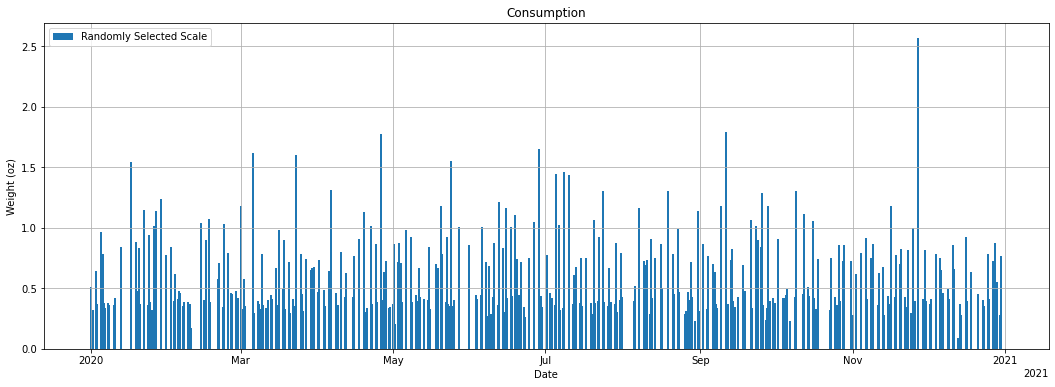

In [12]:
eda.plot_weights(clean_consumption, 'Consumption', 'Randomly Selected Scale', bar = True)

#### Daily Consumption

In [13]:
daily_consumption = de.consumption_daily(consumption_series = clean_consumption)

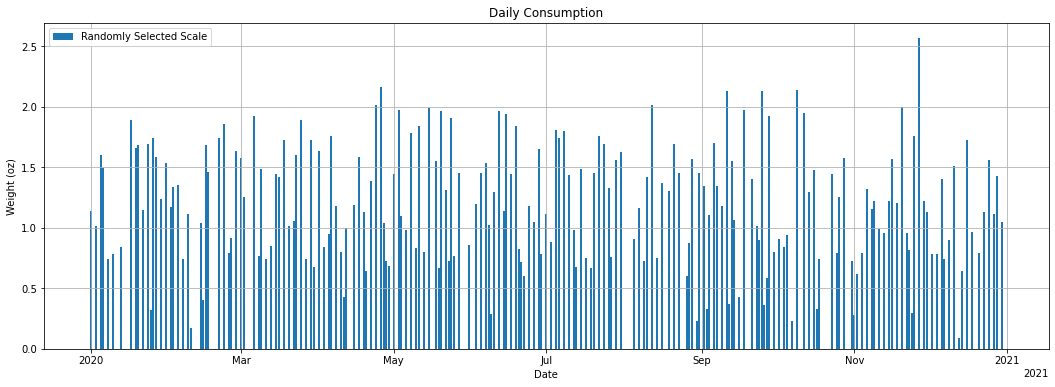

In [14]:
eda.plot_weights(daily_consumption, 'Daily Consumption', 'Randomly Selected Scale', bar = True)

# Modeling Approach
## What are we trying to answer?
An end to end smart subscription contains multiple components. Right now were are just considering the ordering process.
**When should a new order be triggered for customer (X) for just-in-time delivery of product (a)?**

### Question subcomponents
1. Shipping duration estimate
- How long will shipping take for product (a) to reach customer (X)?
2. Remaining life of customer's current stock estimate
- How many days of consumption of product (a) does customer (X) have left in current stock?

Currently we're trying to answer question (2).


### Brief review of a few constraints
1. The weight/stock is directly influenced by the customer's consumption
2. As long as there is product available, we can assume future consumption on a long enough timeline
3. Scale weight measurement error does occur
4. New bags come in a variety of weights (12oz, 32oz, etc.)
5. Scale weight should fall within an expected range  
    - minimum = 0  
    - maximum = weight of last bag shipped to customer + prexisting measurement at last bag arrival  

### Forecasting options
We have two general paths we can take to answer our question: How many days of consumption of product (a) does customer (X) have left in current stock?
1. Forecast expected number of days left using historic weight
    - forecast future weight using historic weight
    - set a threshold, likely 0 or some number representing '1 day of consumption left' 
    - find the timestamp where the forecast crosses the threshold
2. Forecast expected number of days left using historic consumption
    - calculate consumption from historic weight  
    - forecast consumption  
    - set a threshold, likely 0 or some number representing '1 day of consumption left'  
    - find the timestamp where the forecast crosses the threshold  

For the sake of simplicity we might think option (1) would be better, because we have one less step listed. However, asssume there are subcomponents to each step. We also haven't given the problem constraints much consideration.

#### Detailed assessment of options
1. Forecasts should assume no replenishment within forecast period. Put another way, we need to assume a contantly diminishing stock.
    - **Weight based forecast**
        - weight series requires correction
            - could calculate an **infinite** weight series, essentially a backwards cumulative weight
    - **Consumption based forecast**
        - Earlier in the EDA portion we already saw how we can correct consumption on replenishment days
2. Expect some missing or bad data in weight measurements
    - **Weight based forecast**
        - Difficult to correct, because weight at timestamp t is dependent on weight at t-1
        - Possible solution would use a pseudo or expected consumption
            - solution space traveling: weight -> consumption - weight
            - non-optimal path
    - **Consumption based forecast**
        - We have historic values we can use to create a correction method
            - consumption at timestamp t is, for the most part, independent on consumption at t-1 
                - consumer might self-ration, but unlikely, or infrequent
                - consumption at time t-1 might indicate availability of consumer (in town/out of town) but that is not true dependence
3. There will be days where no product is available for consumption (AKA stock is empty)
    - **Weight based forecast**
        - Weight values for days with no available product for consumption will innaccurately describe consumer behavior
        - This would be difficult to continually correct for the same reason in # 3
    - **Consumption based forecast**
        - Again, we have historic values we can use to create a correction method        

All that to say **consumption is a simplified solution allows for more flexibilty when we come across problems with modeling**.

Lets now reframe our question:
**Given the current weight and historic consumption, how many remaining days of available consumption remain?**

This has now essentially been converted to a inventory problem.

Before we totally write off weight forecasting in general, let's run through a quick analysis to see why.

## Statistical Modeling

I will not be going into a full explination of statistical time series modeliing here. If you're curious to learn more, feel free to checkout my growing [repository of resources and notes](https://github.com/jbpauly/notes/tree/master/content/time_series). It is important to review a bit from a high level. The following comes from my notes of Aileen Nielsen's 2017 PyCon tutorial: [Time Series Analysis](https://www.youtube.com/watch?v=zmfe2RaX-14&t=25s)

### Requirements
In general, stationary data is required for use of statistical methods. There are some modeling approaches that can account for non-stationarity, which we might look into.
#### Elements of Stationarity:
1. Constant Mean
    - Value is not drifting over time
2. Constant Variance
    - Unpredictability is not changing over time
3. Constant Autocorrelation
    - Structure is not changing over time 

In the real world, we rarely find stationary data, so we have to correct for it. Most commonly, seasonality and trending cause non-stationarity.

#### Transformations: non-stationary -> stationary
1. Remove trending
    - difference or log difference of values
    - subtract a moving average from values
    - take a linear regression of values
2. Remove seasonality
    - average around seasons
    - use **locally weighted scatterplot smoothing (loess)**
3. Remove increasing variance
    - power transformation
    - log transformation
    
Other high points to not regarding transformations for stationarity:
- Try and use transformations that are 1 to 1
    - That way it's easy to get back to original solution space
    - It is okay to have multiple transforms if you can keep track of it, AND it is necessary
- Don't try and remove autocorrelation
    - Generally tough to do and probably means there's an underlying aspect of the problem we're not considering (should I break this up into different time datasets)

### Modeling
The umbrella of ARIMA models are the most common form of statistical time series models. 

#### Autoregressive (AR(p))
> X_t = φ_1*X_t-1 +…+ φ_pX_t-p + ε_t
- Stationary process if abs(φ) < 1
- Essentially AR says your past value has something to do with your present value
- Use PACF plot to find p

#### Moving Average (MA(q))
> X_t = μ + ε_t + θ_1ε_t-1 +…+ θ_qε_t-q 
- Stationary process regardless of values of θ
- Essentially MA says you oscolate around a mean, μ, with some error
- Use ACF plot to find q

#### ARIMA
Combination of AR+MA plus an extra term, I
- I value
    - accounts for differencings of series
    - this helds removing trending, SO you don't always have to remove trending before modeling, but you need to specify the differencing value

#### SARIMAX
Decomposes model into two components, each having their own AR, I, MA, qualities
1. seasonal
2. non seasonal


### Weight forecasting
We will take a brief look at weight to help describe elements of statistical modeling, even though we don't plan to use it long term.

Ignoring the obvious trending and seasonality, lets just try out a few models to get comfortable with the ARIMA models

1. AR
- Heavily assumes past value at t-1 influences value at t
- Above statement should lead us to think AR would apply well for the raw weight
    - In theory we should always have a negatively trending weight between bag cylces, so weight today, is influenced by weight yesterday
2. MA
- Heavily assumes mean reversion, think if it like values oscolating around the mean at random with some error
- Above statement should lead us to think MA might not apply well for raw weight
    - Short term moving average might be okay, but will really struggle with new shipments
    - Overall trending will be dampened
3. ARIMA
- Combination of AR + MA, with a third factor (I)
- detrend the data in modeling
4. SARIMAX
- ARIMA with seasonal handling

#### Quick check for stationarity

In [41]:
weight = sample.copy()
wt_rolling_mean = weight.rolling(7).mean()
wt_rolling_std = weight.rolling(7).std()

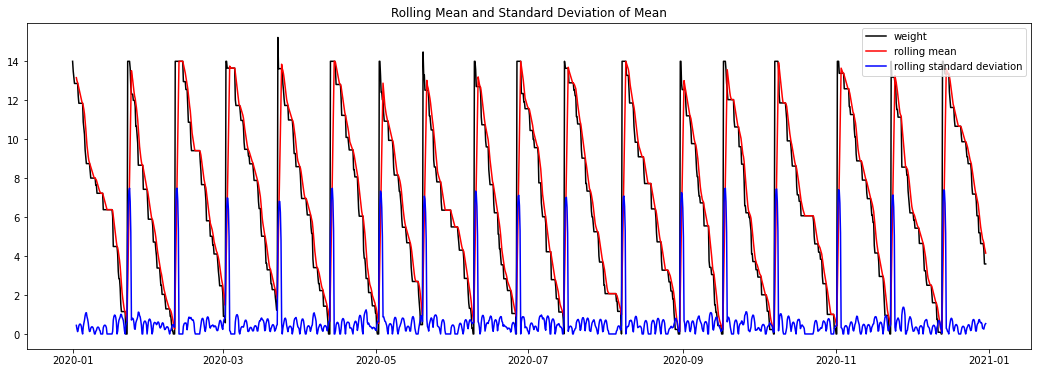

In [42]:
fig = plt.figure(figsize=(18, 6))
raw = plt.plot(weight, color = 'black', label ='weight')
wt_mean = plt.plot(wt_rolling_mean, color = 'red', label ='rolling mean')
wt_std = plt.plot(wt_rolling_std, color = 'blue', label ='rolling standard deviation')
plt.title('Rolling Mean and Standard Deviation of Mean')
plt.legend()
plt.show()

#### Conclusion
**Raw weight is non-stationary**. There's obvious seasonality from product to product cycles, and constant negative trending locally within the cycles.

Non-stationarity can also be seen in standard deviation and mean at the same rolling window. 

### Check ACF plot

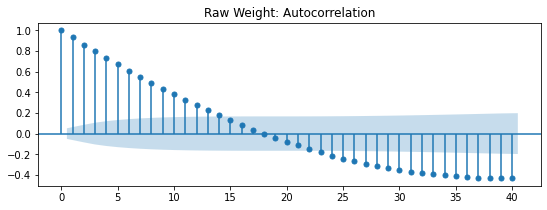

In [17]:
fig = plt.figure(figsize=(9,3))
ax1 = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_acf(weight, lags=40, ax = ax1, title='Raw Weight: Autocorrelation')
plt.show()

#### Conclusion
As expected, ACF ~ MA, will not be useful because of trending 

### Check PACF plot

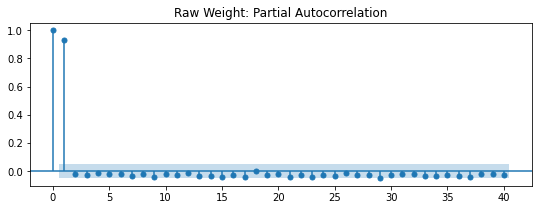

In [18]:
fig = plt.figure(figsize=(9,3))
ax1 = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(weight, lags=40, ax = ax1, title='Raw Weight: Partial Autocorrelation')
plt.show()

#### Conclusion
As expected, we see the dependecy of weight at timestep t from t-1, and no relationship to anything beyond that

# TODO 
- model ARIMA 
    - (1,0,0)
    - maybe try with an I component
    - maybe try SARIMAX
    - Address that size of model lags dictates how long we can forecast
- describe why we won't work through detrending or removing seasonality to continue forecasting  
    - consumption is already a step in the right direction, detrends the data